Half of the distribution should yield 0.5, and we got 0.523


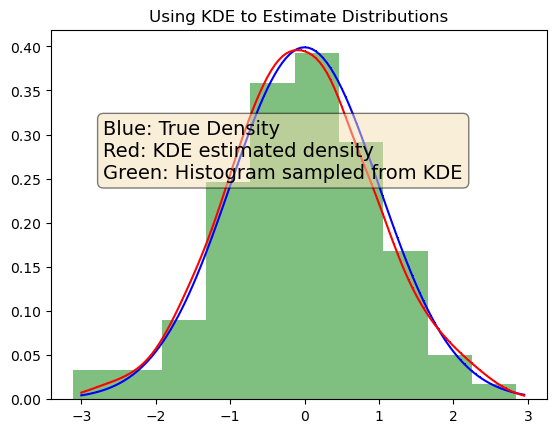

In [1]:
#!/usr/bin/env python

'''
    Given a data of 1 dimension, we can easily approximate the distribution p(x)
    By calling cdf_val = Pₓ.integrate(-7, 0), we can even get its cdf value
    
    In this example
        1. We generated samples from a normal distribution
        2. We use KDE to approximate p(x)
        3. We show how close our approximation is against the true distribution.
'''


import wuml 
import numpy as np
import scipy.stats
from wplotlib import histograms
from wplotlib import lines
	

data = wuml.wData(X_npArray=np.random.randn(1000))
Pₓ = wuml.KDE(data)

X = np.arange(-3,3,0.05)
realProb = scipy.stats.norm(0, 1).pdf(X)
estimatedProb = Pₓ(X)
newX = Pₓ.generate_samples(300)
cdf_val = Pₓ.integrate(-7, 0)		# you can get the cdf by integration.
print('Half of the distribution should yield 0.5, and we got %.3f'%cdf_val)

textstr = 'Blue: True Density\nRed: KDE estimated density\nGreen: Histogram sampled from KDE'
lp = lines()
H = histograms()
lp.add_plot(X,realProb, color='blue', marker=',')
lp.add_plot(X,estimatedProb, color='red', marker=',')
lp.add_text(X,estimatedProb, textstr, β=0.8)
H.histogram(newX, num_bins=10, title='Using KDE to Estimate Distributions', facecolor='green', α=0.5, showImg=False, normalize=True)

H.show()
